In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapath = '/data/p-one/llallement/dimuon_generator/PYTHIA/data_files/'

In [3]:
# 1. Charm hadrons distribution

# Just to know which hadrons result of the the charm quark
# hadronization.

# Here the plot is only for neutrino events, but similar
# results are obtained for antineutrino events (antihadrons).

In [4]:
# load the data of a single file and extract the CDG codes
# of the outgoing charm hadrons

data_file = datapath + '110007_charmOutput.txt'

cdg_hadrons = []

with open(data_file, 'r') as file:
    for line in file:
        if line.startswith('P') and line.split()[1] == '3':
            line_values = line.strip().split('\t')
            cdg_hadrons.append(int(line_values[2]))

In [5]:
# count how many of each hadron type there is

pdg_codes = [411, 421, 431, 4232, 4132, 4122, 4332]
hadron_counts = []

for code in pdg_codes:
    count = cdg_hadrons.count(code)
    hadron_counts.append(count)

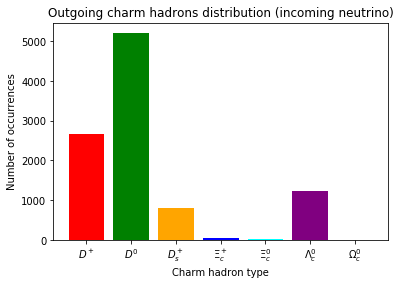

In [23]:
# plot the distribution

hadron_names = ['$D^+$', '$D^0$', '$D_s^+$', '$\Xi_c^+$',
                '$\Xi_c^0$', '$\Lambda_c^0$', '$\Omega_c^0$']
colors = ['red', 'green', 'orange', 'blue', 'cyan',
          'purple', 'magenta']

plt.bar(hadron_names, hadron_counts, color=colors)
plt.xlabel('Charm hadron type')
plt.ylabel('Number of occurrences')
plt.title('Outgoing charm hadrons distribution (incoming neutrino)')
plt.show();

In [7]:
# 2. Inelasticity distribution

# The interaction here is:
# (anti)neutrino + proton/neutron --> muon + charm quark.
# The charm quark then hadronizes and becomes a charm hadron.

# The inelasticity is defined by the ratio of the energy of
# the charm quark by the energy of the neutrino. The
# inelasticty distribution should be different for neutrino
# and antineutrino events.

In [8]:
# load the data for the neutrino events

energy_neutrinos = []
energy_quarks = []

for i in range(1, 4): # for neutrinos: i may be in [1, 51]
    data_file = datapath + str(110000 + i) + '_charmOutput.txt'

    with open(data_file, 'r') as file:
        lines = file.readlines()

    line_count = len(lines)

    for j, line in enumerate(lines):
        if line.startswith('E'):
            try:
                line_values = line.strip().split('\t')
                # if 100 <= float(line_values[3]) <= 250 and j + 4 < line_count:
                # use this line instead to select neutrinos of lower energy only
                if j + 4 < line_count:
                    energy_neutrinos.append(float(line_values[3]))
                    
                    quark_line = lines[j + 2]
                    quark_values = quark_line.strip().split('\t')
                    energy_quarks.append(float(quark_values[3]))

            except (ValueError, IndexError):
                continue

In [9]:
# calculate the inelasticity for neutrino events

inelasticity_neutrinos = np.array(energy_quarks) / np.array(energy_neutrinos)

In [10]:
# load the data for the antineutrino events

energy_antineutrinos = []
energy_antiquarks = []

for i in range(51, 54): # for antineutrinos: i may be in [51, 101]
    data_file = datapath + str(110000 + i) + '_charmOutput.txt'

    with open(data_file, 'r') as file:
        lines = file.readlines()

    line_count = len(lines)

    for j, line in enumerate(lines):
        if line.startswith('E'):
            try:
                line_values = line.strip().split('\t')
                # if 100 <= float(line_values[3]) <= 250 and j + 4 < line_count:
                # use this line instead to select antineutrinos of lower energy only
                if j + 4 < line_count:
                    energy_antineutrinos.append(float(line_values[3]))
                    
                    quark_line = lines[j + 2]
                    quark_values = quark_line.strip().split('\t')
                    energy_antiquarks.append(float(quark_values[3]))

            except (ValueError, IndexError):
                continue

In [11]:
# calculate the energy for antineutrino events

inelasticity_antineutrinos = np.array(energy_antiquarks) / np.array(energy_antineutrinos)

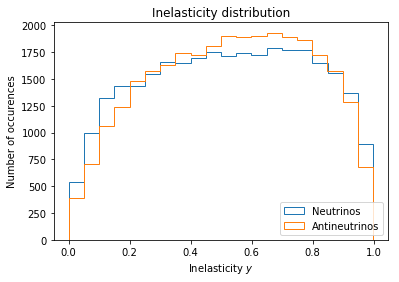

In [12]:
# plot both distributions

plt.hist(inelasticity_neutrinos, bins=20, histtype='step', label='Neutrinos')
plt.hist(inelasticity_antineutrinos, bins=20, histtype='step', label='Antineutrinos')
plt.xlabel(r'Inelasticity $y$')
plt.ylabel('Number of occurences')
plt.legend(loc='lower right')
plt.title('Inelasticity distribution')
plt.show();

In [13]:
# 3. Mean inelasticity

# Neutrino energy goes from 50 GeV to 1 PeV in the data we
# have. We put these energy values into different bins and
# calculate the mean inelasticity corresponding to the events
# in one bin.

# Here the plot is only for neutrino events, but similar
# results are obtained for antineutrino events.

In [14]:
# load the data (neutrino energies and event indices)

neutrino_energies = []
event_indices = []

for i in range(1, 4):
    data_file = datapath + str(110000 + i) + '_charmOutput.txt'

    with open(data_file, 'r') as file:
        for line in file:
            if line.startswith('E'):
                line_values = line.strip().split('\t')
                neutrino_energies.append(float(line_values[3]))
                event_indices.append(str(i) + '-' + str(line_values[2]))
            
neutrino_energies = np.array(neutrino_energies)
event_indices = np.array(event_indices)

In [15]:
# get the events in each bin depending on neutrino energy

n_bins = 50
log_bins = np.logspace(np.log10(min(neutrino_energies)),
                       np.log10(max(neutrino_energies)),
                       num=n_bins)

hist_counts, bin_edges = np.histogram(neutrino_energies, bins=log_bins)

bin_indices = np.digitize(neutrino_energies, bin_edges)

events_in_bins = {}

for i, idx in enumerate(bin_indices):
    bin_num = idx - 1
    event_idx = event_indices[i]
    if bin_num in events_in_bins:
        events_in_bins[bin_num].append(event_idx)
    else:
        events_in_bins[bin_num] = [event_idx]

In [16]:
# load the data (neutrino and charm quark energy) and sort it
# according to bins

nu_energy_in_bins = {}
c_energy_in_bins = {}
    
for i in range(0, n_bins):
    indices_of_interest = events_in_bins.get(i, [])

    for k in range(1, 4):
        data_file = datapath + str(110000 + k) + '_charmOutput.txt'
    
        with open(data_file, 'r') as file:
            lines = file.readlines()

        line_count = len(lines)

        for j, line in enumerate(lines):
            if line.startswith('E'):
                try:
                    line_values = line.strip().split('\t')
                    index = str(k) + '-' + str(line_values[2])

                    if index in indices_of_interest and j + 4 < line_count:
                        quark_line = lines[j + 2]
                        quark_values = quark_line.strip().split('\t')

                        if i in nu_energy_in_bins:
                            nu_energy_in_bins[i].append(float(line_values[3]))
                            c_energy_in_bins[i]. append(float(quark_values[3]))
                        else:
                            nu_energy_in_bins[i] = [float(line_values[3])]
                            c_energy_in_bins[i] = [float(quark_values[3])]

                except (ValueError, IndexError):
                    continue

In [17]:
# calculate the mean inelasticity in each bin (and
# statistical error)

inelasticity_means = []
inelasticity_errors = []

for i in range(0, 50): # not taking the last bin
    nu_energy_array = np.array(nu_energy_in_bins.get(i, []))
    c_energy_array = np.array(c_energy_in_bins.get(i, []))
    
    inelasticity = c_energy_array / nu_energy_array

    if len(inelasticity) > 0:
        inelasticity_mean = np.mean(inelasticity)
        inelasticity_means.append(inelasticity_mean)

        inelasticity_error = np.std(inelasticity) / np.sqrt(len(inelasticity))
        inelasticity_errors.append(inelasticity_error)
    
    else:
        inelasticity_means.append(np.nan)
        inelasticity_errors.append(np.nan)

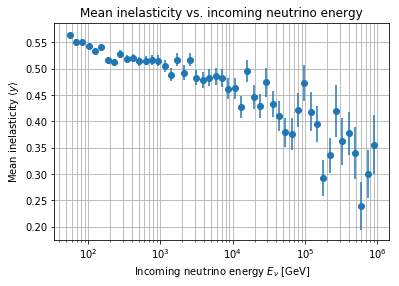

In [18]:
# plot the mean inelasticity as a scatter plot

bin_widths = np.diff(bin_edges)
bin_centers = bin_edges[:-1] + bin_widths / 2
last_bin_center = bin_edges[-1] + bin_widths[-1] / 2
bin_centers = np.append(bin_centers, last_bin_center)

plt.errorbar(bin_centers, inelasticity_means, yerr=inelasticity_errors,
             fmt='o', zorder=2)

plt.xlabel(r'Incoming neutrino energy $E_\nu$ [GeV]')
plt.ylabel(r'Mean inelasticity $\langle y \rangle$')
plt.xscale('log')
plt.title('Mean inelasticity vs. incoming neutrino energy')

plt.grid(which='both', zorder=1)
plt.show();

In [19]:
# 4. Mean opening angle

# Still using a binned distribution based on neutrino energy,
# we can calculate the mean opening angle between the
# incoming neutrino and the outgoing charm hadron.

# Here the plot is only for neutrino events, but similar
# results are obtained for antineutrino events.

# A 2D plot may be better advised here.

In [20]:
# load the data (neutrino energy and zenith and azimuth angles
# of the neutrino and charm hadron) and sort it according to
# bins (same bins as before)

nu_energy_in_bins = {}
mu_theta_in_bins = {}
mu_phi_in_bins = {}
h_theta_in_bins = {}
h_phi_in_bins = {}

for i in range(0, n_bins):
    indices_of_interest = events_in_bins.get(i, [])
    
    for k in range(1, 4):
        data_file = datapath + str(110000 + k) + '_charmOutput.txt'
    
        with open(data_file, 'r') as file:
            lines = file.readlines()

        line_count = len(lines)

        for j, line in enumerate(lines):
            if line.startswith('E'):
                try:
                    line_values = line.strip().split('\t')
                    index = str(k) + '-' + str(line_values[2])

                    if index in indices_of_interest and j + 4 < line_count:
                        mu_line = lines[j + 1]
                        mu_values = mu_line.strip().split('\t')

                        h_line = lines[j + 3]
                        h_values = h_line.strip().split('\t')

                        if i in nu_energy_in_bins:
                            nu_energy_in_bins[i].append(float(line_values[3]))
                            mu_theta_in_bins[i].append(float(mu_values[4]))
                            mu_phi_in_bins[i].append(float(mu_values[5]))
                            h_theta_in_bins[i].append(float(h_values[4]))
                            h_phi_in_bins[i].append(float(h_values[5]))
                        else:
                            nu_energy_in_bins[i] = [float(line_values[3])]
                            mu_theta_in_bins[i] = [float(mu_values[4])]
                            mu_phi_in_bins[i] = [float(mu_values[5])]
                            h_theta_in_bins[i] = [float(h_values[4])]
                            h_phi_in_bins[i] = [float(h_values[5])]

                except (ValueError, IndexError):
                    continue

In [21]:
# calculate the mean opening angle in each bin (and
# statistical error)

op_angle_means = []
op_angle_errors = []

for i in range(0, n_bins):
    mu_theta = np.array(mu_theta_in_bins.get(i, []))
    mu_phi = np.array(mu_phi_in_bins.get(i, []))
    h_theta = np.array(h_theta_in_bins.get(i, []))
    h_phi = np.array(h_phi_in_bins.get(i, []))
    
    mu_x = np.sin(mu_theta) * np.cos(mu_phi)
    mu_y = np.sin(mu_theta) * np.sin(mu_phi)
    mu_z = np.cos(mu_theta)

    h_x = np.sin(h_theta) * np.cos(h_phi)
    h_y = np.sin(h_theta) * np.sin(h_phi)
    h_z = np.cos(h_theta)
    
    dot_product = mu_x * h_x + mu_y * h_y + mu_z * h_z
    
    mu_mag = np.sqrt(mu_x**2 + mu_y**2 + mu_z**2)
    h_mag = np.sqrt(h_x**2 + h_y**2 + h_z**2)

    op_angle_rad = np.arccos(dot_product / (mu_mag * h_mag))
    op_angle = np.degrees(op_angle_rad)

    if len(op_angle) > 0:
        op_angle_mean = np.mean(op_angle)
        op_angle_means.append(op_angle_mean)

        op_angle_error = np.std(op_angle) / np.sqrt(len(op_angle))
        op_angle_errors.append(op_angle_error)

    else:
        op_angle_means.append(np.nan)
        op_angle_errors.append(np.nan)

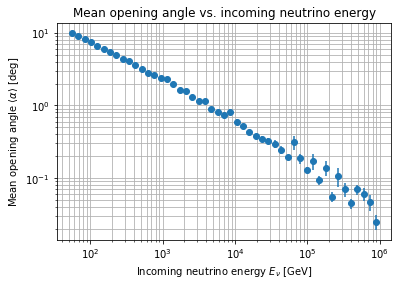

In [22]:
# plot the mean opening angle as a scatter plot

bin_widths = np.diff(bin_edges)
bin_centers = bin_edges[:-1] + bin_widths / 2
last_bin_center = bin_edges[-1] + bin_widths[-1] / 2
bin_centers = np.append(bin_centers, last_bin_center)

plt.errorbar(bin_centers, op_angle_means, yerr=op_angle_errors,
             fmt='o', zorder=2)

plt.xlabel(r'Incoming neutrino energy $E_\nu$ [GeV]')
plt.ylabel(r'Mean opening angle $\langle \alpha \rangle$ [deg]')
plt.xscale('log')
plt.yscale('log')
plt.title('Mean opening angle vs. incoming neutrino energy')

plt.grid(which='both', zorder=1)
plt.show();